<a href="https://colab.research.google.com/github/msaleem-aisci/pytorch-workshop/blob/main/Pytorch_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Youtube link**

[Video Session](https://www.youtube.com/live/k5e1IP5QjrI?si=b86q0TitThS1Sm_n)

# Workshop Agenda:

**1 Tensors**
* Scalar
* Vector
* Matrix
* Tensor
* Tensor vs NumPy array
* dtype, shape, device

**2 Tensor Creation Methods**
* torch.tensor()
* torch.arange()
* torch.linspace()
* torch.rand() and torch.randn()
* torch.ones() and torch.zeros()

**3 Tensor Manipulation**
* Reshaping (view vs reshape)
* Broadcasting
* Element-wise and matrix operations

**4 AutoGrad for Computing Gradients (Most Important Feature)**
* Computational Graph
* Forward Pass (Building Graph)
* Backward Pass (backward())
* requires_grad and grad
* Gradient accumulation

**5 ANN Using PyTorch (Beyond APIs)**
* Manual weights and bias
* Manual forward pass
* Manual training loop
* nn.Module
* nn.Linear
* Optimizer
* Training pipeline

**6 Training on GPU**

* Why GPU over CPU
* Using CUDA in PyTorch














_________________________________

# **Important Libraries**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.datasets import make_circles

import time


# **Helper Functions + Code**

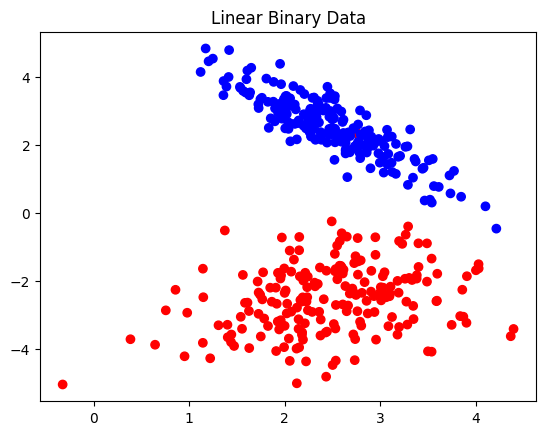

In [ ]:
X_lin, y_lin = make_classification(
    n_samples=400,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    class_sep=2.5,
    random_state=42
)

X_l = torch.tensor(X_lin, dtype=torch.float32)
y_l = torch.tensor(y_lin, dtype=torch.float32).view(-1, 1)

plt.scatter(X_l[:,0], X_l[:,1], c=y_l.squeeze(), cmap="bwr_r")
plt.title("Linear Binary Data")
plt.show()


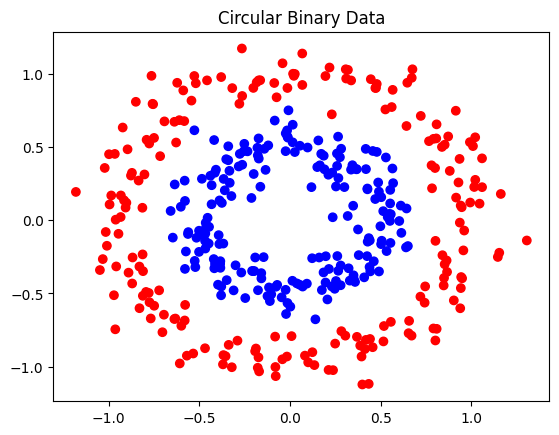

In [ ]:
X_circ, y_circ = make_circles(
    n_samples=400,
    noise=0.1,
    factor=0.5,
    random_state=42
)

X_train = torch.tensor(X_circ, dtype=torch.float32)
y_train = torch.tensor(y_circ, dtype=torch.float32).view(-1, 1)

plt.scatter(X_train[:,0], X_train[:,1], c=y_train.squeeze(), cmap = "bwr_r")
plt.title("Circular Binary Data")
plt.show()

In [ ]:
def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    x_min, x_max = X[:,0].min()-0.5, X[:,0].max()+0.5
    y_min, y_max = X[:,1].min()-0.5, X[:,1].max()+0.5
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )
    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    with torch.no_grad():
        Z = model(grid)
        Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, levels=1, alpha=0.6)
    plt.contour(xx, yy, Z, levels=[0.5], colors="black", linewidths=2)
    plt.scatter(X[:,0], X[:,1], c=y.squeeze(), edgecolors='k')
    plt.title(title)
    plt.show()


In [ ]:
def sigmoid(z):
    return 1 / (1 + torch.exp(-z))

def BCELoss(y_hat, y):
    eps = 1e-6
    return -torch.mean(
        y * torch.log(y_hat + eps) +
        (1 - y) * torch.log(1 - y_hat + eps)
    )

# Tensor

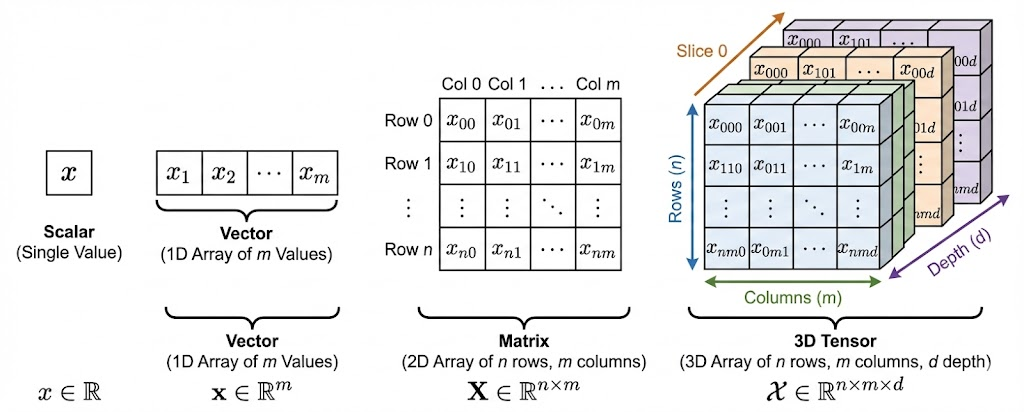

In [ ]:
# Scalar
a = torch.tensor(5)
print(a, a.shape)

tensor(5) torch.Size([])


In [ ]:
# Vector
v = torch.tensor([1., 2., 3.])
print(v, v.shape)

tensor([1., 2., 3.]) torch.Size([3])


In [ ]:
# Matrix
m = torch.tensor([[1., 2.],
                  [3., 4.]])
print(m, m.shape)

tensor([[1., 2.],
        [3., 4.]]) torch.Size([2, 2])


In [ ]:
# Tensor (3D)
t = torch.randn(2, 3, 4)
print(t.shape)

torch.Size([2, 3, 4])


In [ ]:
# dtype and device
x = torch.tensor([1, 2, 3], dtype=torch.float32)
print(x)

tensor([1., 2., 3.])


# **Tensor Creation Methods**



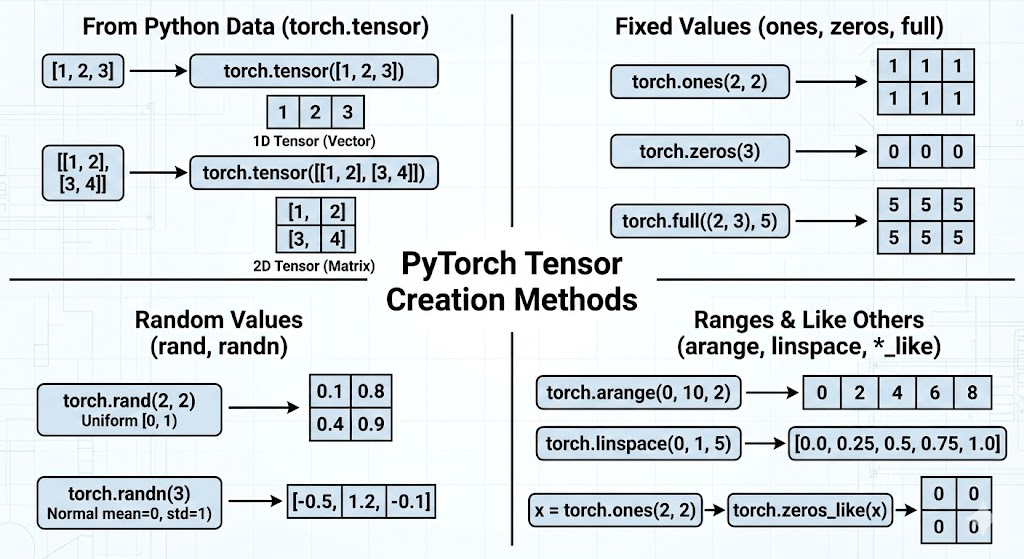

In [ ]:
# From Python data
a = torch.tensor([[1, 2], [3, 4]])
print(a)

tensor([[1, 2],
        [3, 4]])


In [ ]:
# Range tensors

b = torch.arange(0, 10)
c = torch.linspace(1, 100, steps=5)
print(c)

tensor([  1.0000,  25.7500,  50.5000,  75.2500, 100.0000])


In [ ]:
# Random tensors
r1 = torch.rand(1, 2)
r2 = torch.randn(2, 2)

print(r1)

tensor([[0.3122, 0.8591]])


In [ ]:
# Fixed tensors
z = torch.zeros(3, 3)
o = torch.ones(3, 3)

print(o)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


#**Tensor  Manipulation and shapes**

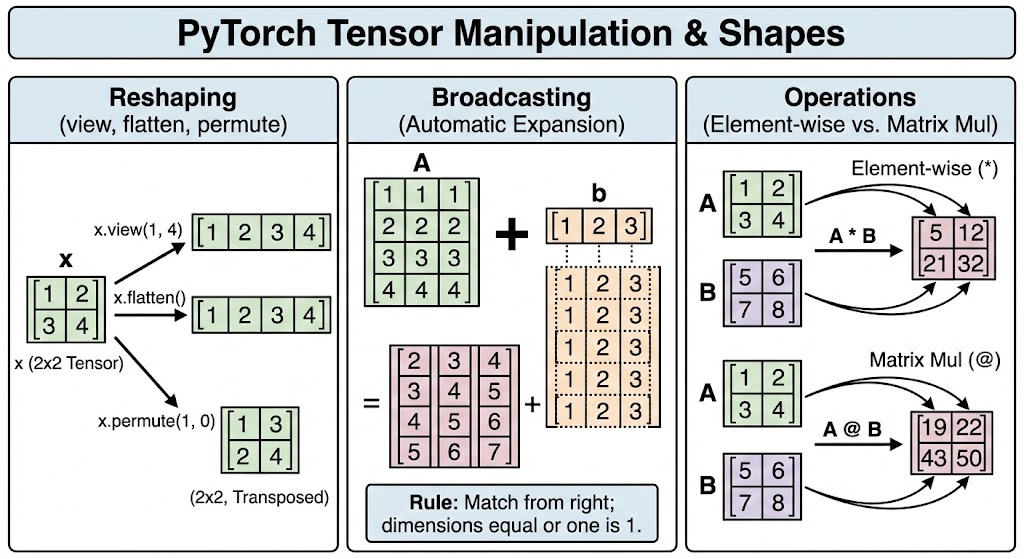

In [ ]:
x = torch.arange(1, 10)
print(x)

# Reshaping
x1 = x.view(3, 3)
x2 = x.reshape(3, 3)

print(x2)

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


In [ ]:
# Broadcasting
a = torch.arange(1, 4)
b = torch.arange(1, 7).reshape(2,3)

print(a)
print(b)

print("_________________________")


print(a + b)

tensor([1, 2, 3])
tensor([[1, 2, 3],
        [4, 5, 6]])
_________________________
tensor([[2, 4, 6],
        [5, 7, 9]])


In [ ]:
# Operations
A = torch.tensor([[1,3], [5,4]])
B = torch.tensor([[2,2], [6,3]])

print("A: ",A)
print("B: ",B)


print("_________________________________")
print(A @ B)
print(A * 2)

A:  tensor([[1, 3],
        [5, 4]])
B:  tensor([[2, 2],
        [6, 3]])
_________________________________
tensor([[20, 11],
        [34, 22]])
tensor([[ 2,  6],
        [10,  8]])


#**AutoGrad: Most important feature of PyTorch**

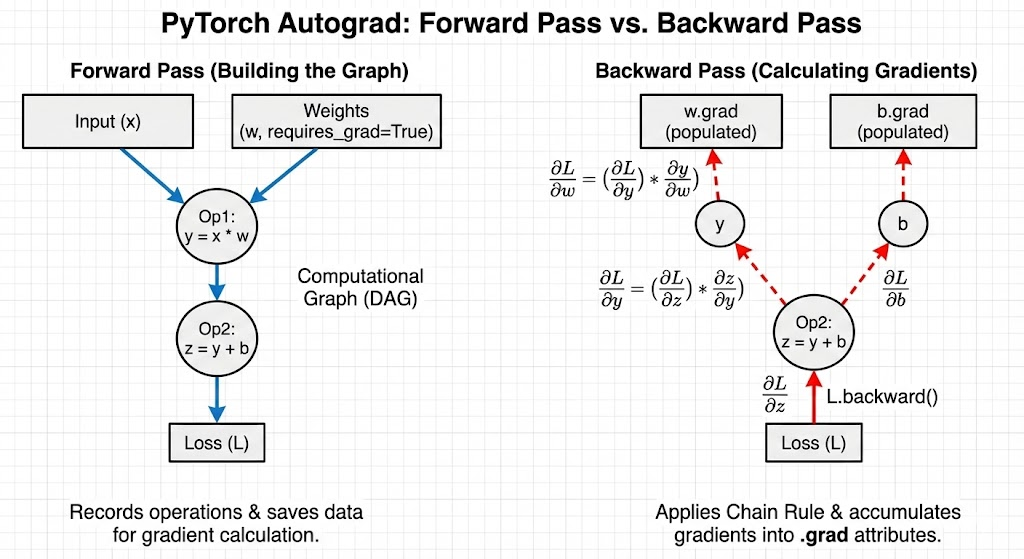

In [ ]:
x = torch.tensor(3., requires_grad=True)
z = torch.tensor(2., requires_grad=True)

z = x**2 + 6*x

y = 4 * z**2 + z



y.backward()
x.grad

tensor(2604.)

# **ANN from scrtach using Pytorch**

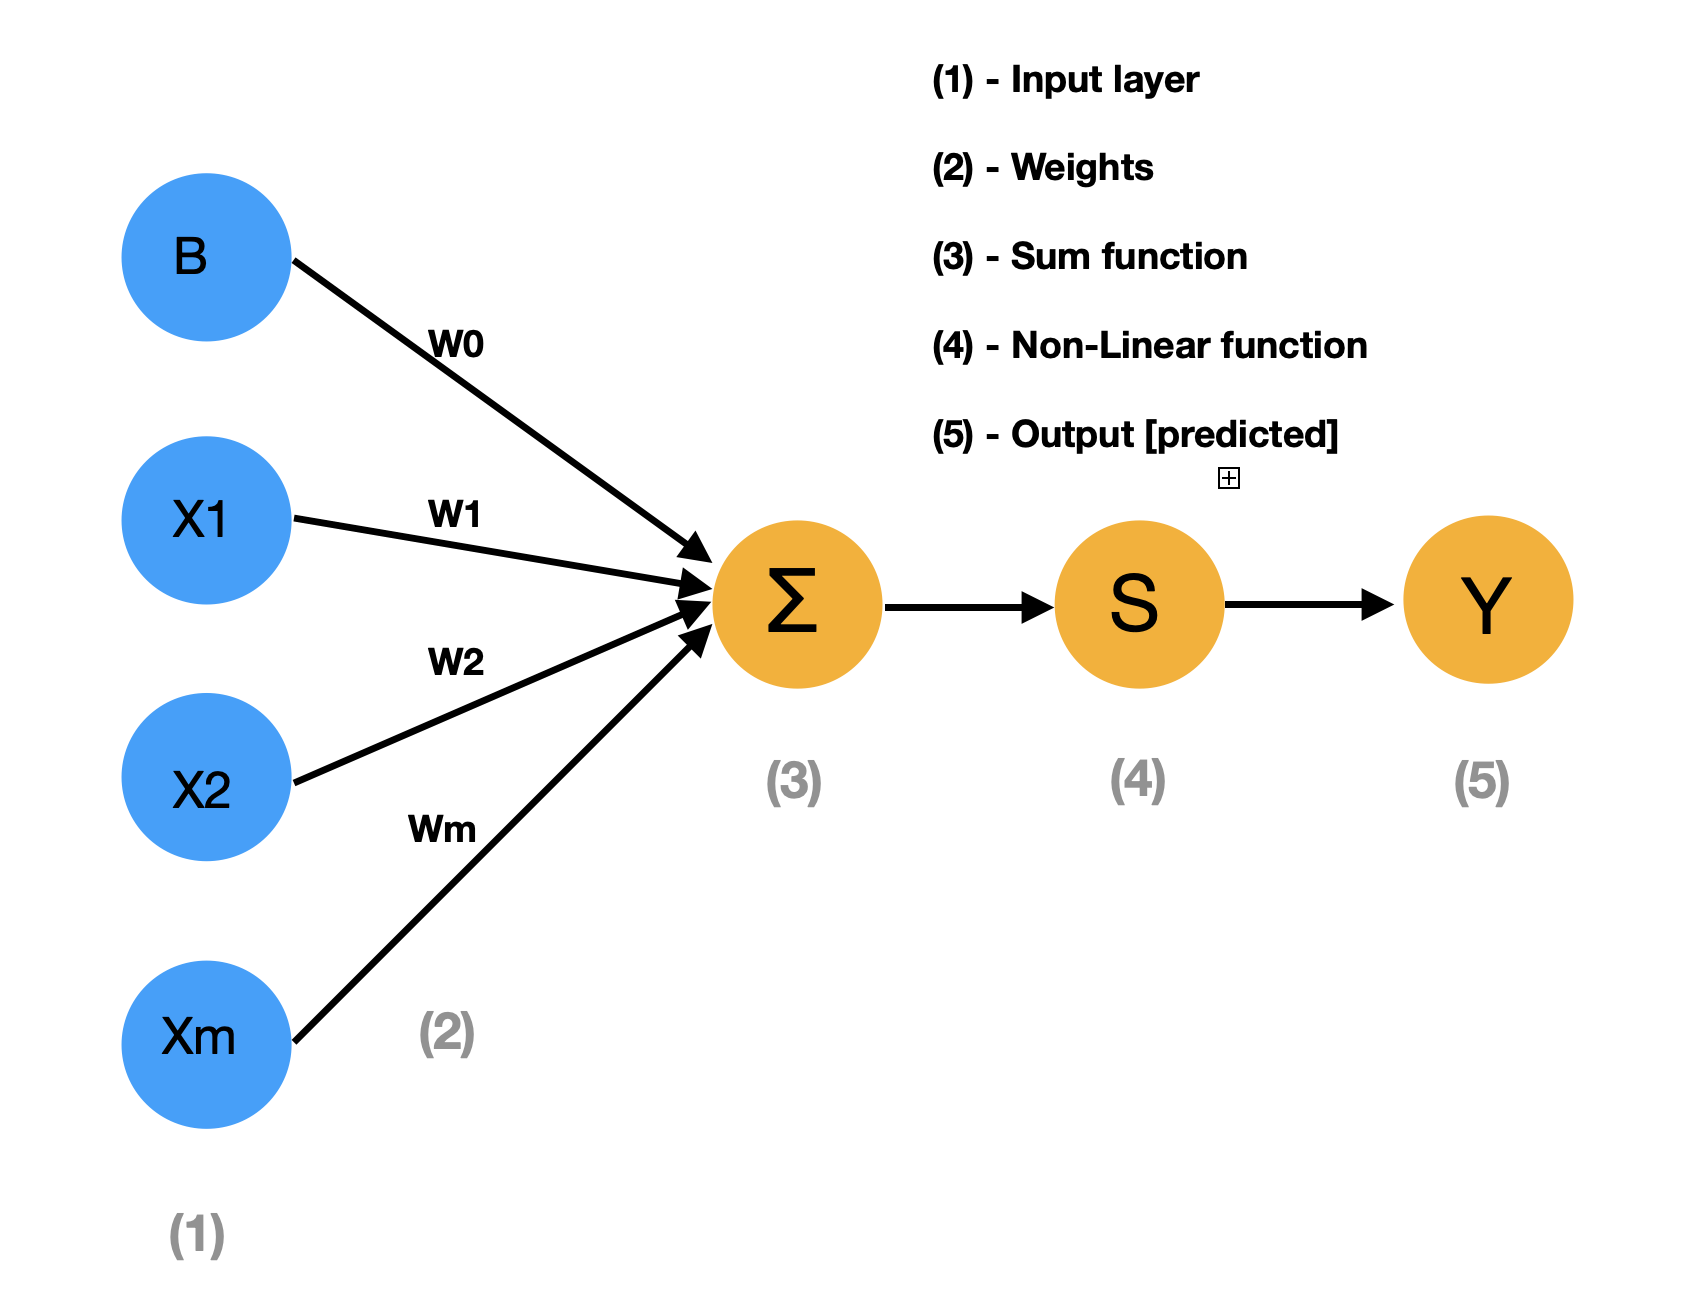

In [ ]:
X_l

torch.Size([400, 2])

In [ ]:
# Neuron
w = torch.randn(1, 2, requires_grad=True)
b = torch.tensor(0., requires_grad=True)




In [ ]:
def forward(X):
  z = X @ w.T + b
  y_hat = sigmoid(z)

  return y_hat



In [ ]:
y_hat = forward(X_l)

BCELoss(y_hat, y_l)

tensor(0.4780, grad_fn=<NegBackward0>)

In [ ]:
lr = 0.001
for i in range(10):
    y_hat = forward(X_l)
    loss = BCELoss(y_hat, y_l)

    loss.backward()
    dw = w.grad
    db = b.grad

    print("w before:", w)
    print("-----------------")
    print("dw: ", dw)
    print("-----------------")


    w.data = w - lr * dw
    b.data = b - lr * db
    print("w after:", w)

    print("Final loss:", loss.item())




w before: tensor([[0.7497, 0.6120]], requires_grad=True)
-----------------
dw:  tensor([[ 0.7192, -0.6692]])
-----------------
w after: tensor([[0.7489, 0.6126]], requires_grad=True)
Final loss: 0.5004899501800537
w before: tensor([[0.7489, 0.6126]], requires_grad=True)
-----------------
dw:  tensor([[ 1.4374, -1.3373]])
-----------------
w after: tensor([[0.7475, 0.6140]], requires_grad=True)
Final loss: 0.49945396184921265
w before: tensor([[0.7475, 0.6140]], requires_grad=True)
-----------------
dw:  tensor([[ 2.1536, -2.0034]])
-----------------
w after: tensor([[0.7453, 0.6160]], requires_grad=True)
Final loss: 0.4973880350589752
w before: tensor([[0.7453, 0.6160]], requires_grad=True)
-----------------
dw:  tensor([[ 2.8668, -2.6663]])
-----------------
w after: tensor([[0.7425, 0.6187]], requires_grad=True)
Final loss: 0.49430450797080994
w before: tensor([[0.7425, 0.6187]], requires_grad=True)
-----------------
dw:  tensor([[ 3.5760, -3.3251]])
-----------------
w after: tensor

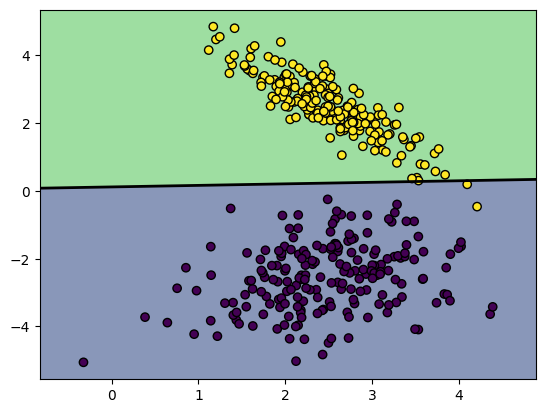

In [ ]:
x_min, x_max = X_l[:,0].min()-0.5, X_l[:,0].max()+0.5
y_min, y_max = X_l[:,1].min()-0.5, X_l[:,1].max()+0.5
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)
grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
with torch.no_grad():
    Z = forward(grid)
    Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=1, alpha=0.6)
plt.contour(xx, yy, Z, levels=[0.5], colors="black", linewidths=2)
plt.scatter(X_l[:,0], X_l[:,1], c=y_l.squeeze(), edgecolors='k')


#**ANN Using PyTorch**

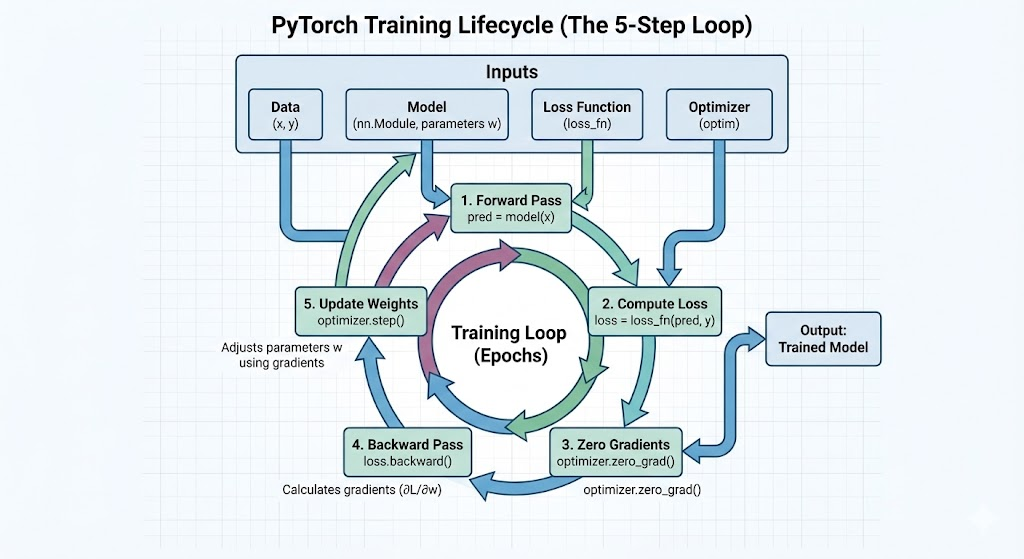

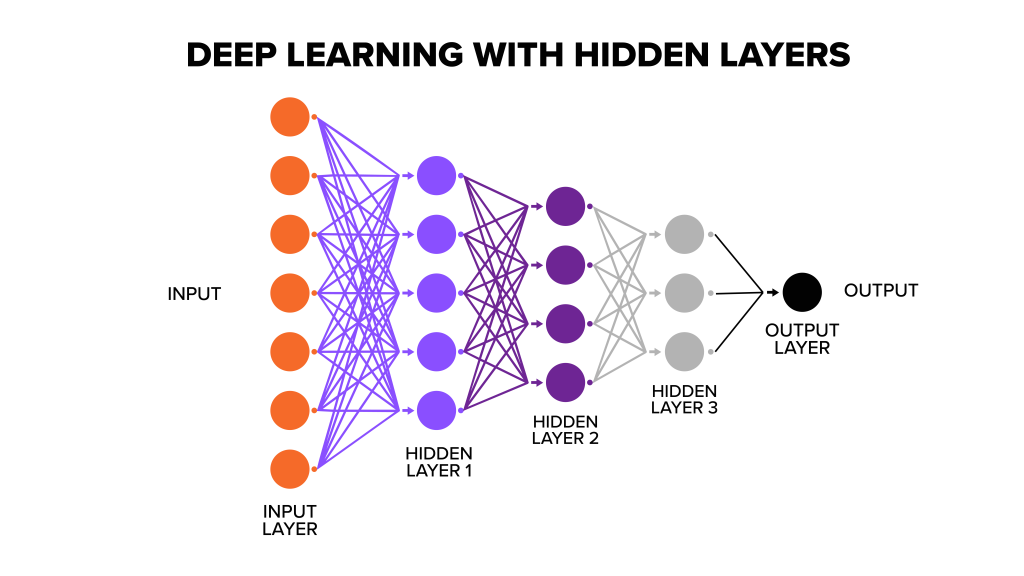

In [ ]:
class ANN(nn.Module):
  def __init__(self,):
    super().__init__()

    self.l1 = nn.Linear(2, 5)
    self.l2 = nn.Linear(5, 4)
    self.l3 = nn.Linear(4, 3)
    self.l4 = nn.Linear(3, 1)

  def forward(self, X):
    out = self.l1(X)
    out = torch.relu(out)

    out = self.l2(out)
    out = torch.relu(out)

    out = self.l3(out)
    out = torch.relu(out)

    out = self.l4(out)
    out = torch.sigmoid(out)

    return out





In [ ]:

model = ANN()

In [ ]:


lf = nn.BCELoss()

optimizer = optim.SGD(model.parameters(), lr = 0.1)


for i in range(5000):
  y_hat = model(X_train)
  loss = lf(y_hat, y_train)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


  print(loss)



tensor(0.7101, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.7089, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.7077, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.7067, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.7057, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.7047, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.7038, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.7030, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.7022, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.7015, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.7008, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.7001, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6995, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6989, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6984, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6979, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6974, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6970, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6966, grad_fn=<Bina

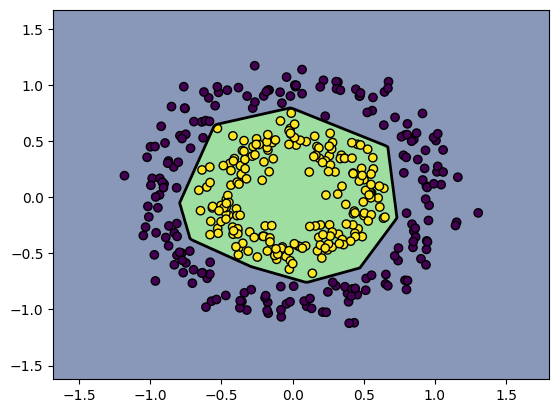

In [ ]:
x_min, x_max = X_train[:,0].min()-0.5, X_train[:,0].max()+0.5
y_min, y_max = X_train[:,1].min()-0.5, X_train[:,1].max()+0.5
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)
grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
with torch.no_grad():
    Z = model(grid)
    Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=1, alpha=0.6)
plt.contour(xx, yy, Z, levels=[0.5], colors="black", linewidths=2)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train.squeeze(), edgecolors='k')


#**Training on GPU**

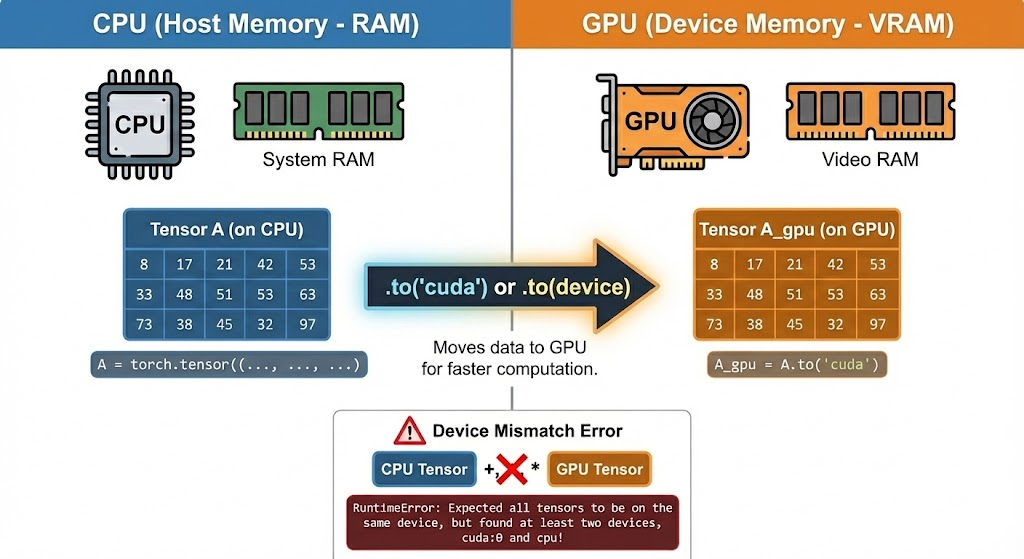

In [ ]:
N = 5000

In [ ]:


tensor_a = torch.rand(N, N)
tensor_b = torch.rand(N, N)

start = time.time()

result_cpu = tensor_a @ tensor_b

end = time.time()
cpu_time = end - start
print(f"CPU Time: {cpu_time:.4f} seconds")

CPU Time: 4.1618 seconds


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"


a_gpu = torch.rand(N, N).to(device)
b_gpu = torch.rand(N, N).to(device)


if device == "cuda":
    torch.cuda.synchronize()

start = time.time()
c = a_gpu @ b_gpu

if device == "cuda":
    torch.cuda.synchronize()

end = time.time()

print(f"GPU time:", end - start, "seconds")

GPU time: 0.22443318367004395 seconds


In [ ]:

def train_single_neuron(X, y, epochs=1000, lr=0.1):
    model = nn.Sequential(
        nn.Linear(2, 1),
        nn.Sigmoid()
    )
    criterion = nn.BCELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    for _ in range(epochs):
        optimizer.zero_grad()
        y_hat = model(X)
        loss = criterion(y_hat, y)
        loss.backward()
        optimizer.step()
    return model


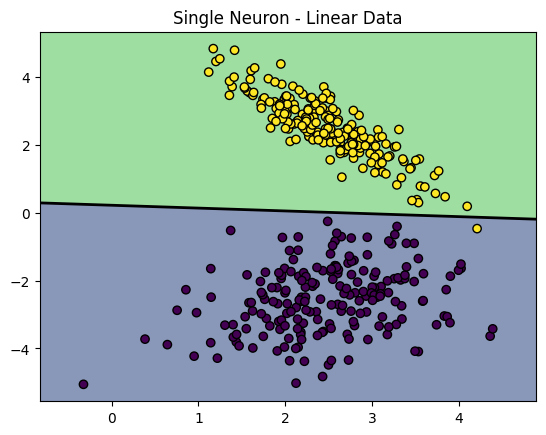

In [ ]:

model_single_lin = train_single_neuron(X_linear, y_linear)
plot_decision_boundary(model_single_lin, X_linear, y_linear, title="Single Neuron - Linear Data")


